### This script contains the following:
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

### 01.Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
#creating path
path = r"C:\Users\Sreelaya Narla\Desktop\Achievement 6\chocolate bar ratings analysis"

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 data', 'prepared data', 'cleaned_flavors_of_cacao.csv'))

### 02.Data cleaning

In [6]:
df.columns

Index(['Company_(Maker-if_known)', 'Specific_Bean_Origin_or_Bar_Name', 'REF',
       'Review_Date', 'Cocoa_Percent', 'Company_Location', 'Rating',
       'Bean_Type', 'Broad_Bean_Origin'],
      dtype='object')

In [7]:
# Drop columns not used in EDA
for col in ['REF', 'Specific_Bean_Origin_or_Bar_Name' ]:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [8]:
#Now rename the cleaned header
df.rename(columns={'Company_(Maker-if_known)' : 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'Review_Date',
 'Cocoa_Percent',
 'Company_Location',
 'Rating',
 'Bean_Type',
 'Broad_Bean_Origin']

In [9]:
# Rename 'Broad_Bean_Origin' to Country to match GeoJSON 
df = df.rename(columns={'Broad_Bean_Origin':'Country'})

In [10]:
# Check for missing values

df.isnull().sum()

Company             0
Review_Date         0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           0
Country             0
dtype: int64

In [11]:
df.shape

(1795, 7)

In [12]:
#visual exploration

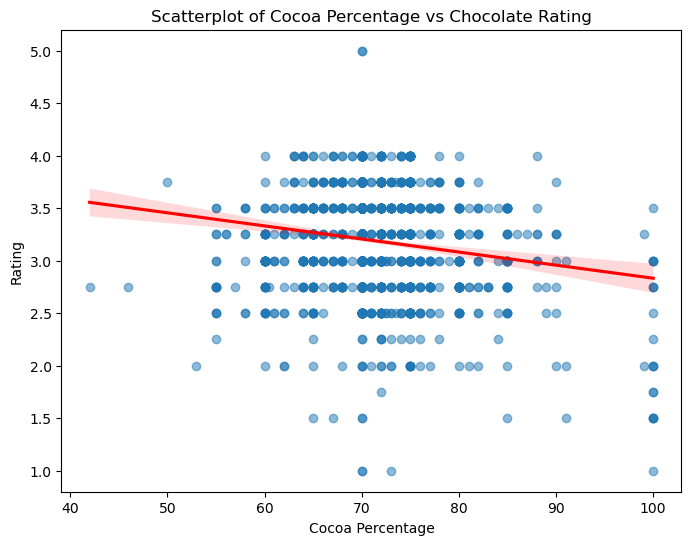

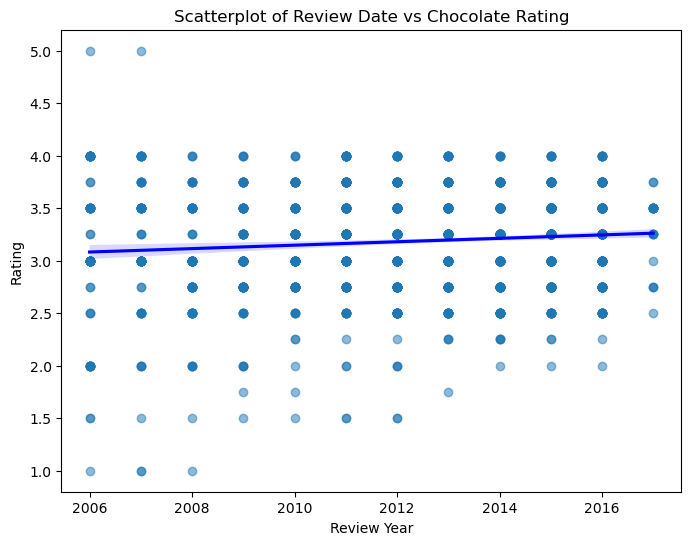

In [13]:
# Scatterplot: Cocoa % vs Rating
plt.figure(figsize=(8,6))
sns.regplot(x='Cocoa_Percent', y='Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatterplot of Cocoa Percentage vs Chocolate Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.show()

# Scatterplot: Review Date vs Rating
plt.figure(figsize=(8,6))
sns.regplot(x='Review_Date', y='Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Scatterplot of Review Date vs Chocolate Rating')
plt.xlabel('Review Year')
plt.ylabel('Rating')
plt.show()

### 04.Regression Analysis

### Hypothesis 01
There is a negative relationship between Cocoa_Percent and Rating.  
As the cocoa percentage in chocolate increases, the average rating decreases slightly. 

In [14]:
# Reshape variables into NumPy arrays

# Independent variable (X) = Cocoa_Percent
X = df['Cocoa_Percent'].values.reshape(-1, 1)

# Dependent variable (y) = Rating
y = df['Rating'].values.reshape(-1, 1)

In [15]:
#Split into training and test sets

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Run linear regression
# Create the model
model = LinearRegression()

# Fit the model to training data
model.fit(X_train, y_train)

# Predict y values for the test set
y_pred = model.predict(X_test)


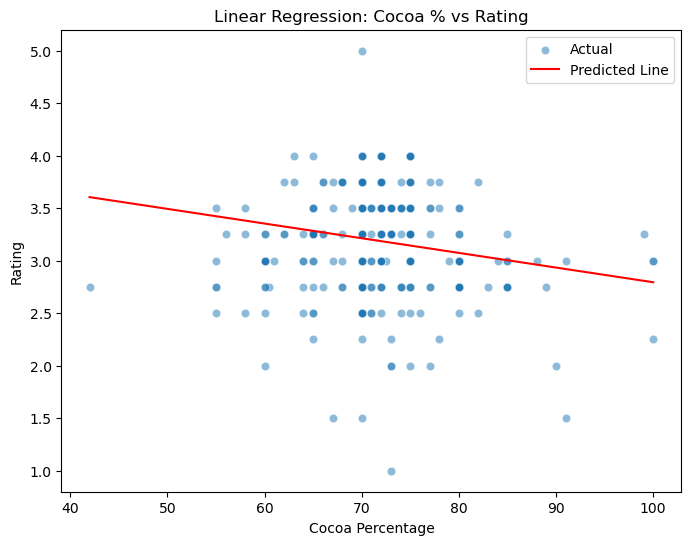

In [17]:
#Plot regression line with test data

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), alpha=0.5, label="Actual")
sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), color="red", label="Predicted Line")
plt.title('Linear Regression: Cocoa % vs Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.legend()
plt.show()


In [18]:
#Model performance (MSE & R²)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.23146324101198754
R² Score: -0.0012994533814203457


In [19]:
#Compare predicted vs actual

results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
results.head(10)

,Actual,Predicted
0,3.00,3.144406
1,3.75,3.214299
2,3.50,3.214299
3,3.50,3.172363
4,3.00,3.214299
5,3.00,3.186342
6,2.75,3.158385
7,3.75,3.214299
8,2.50,3.074513
9,3.25,3.214299


##### Model Fit Interpretation

R² Score: -0.0013 → Essentially zero (even slightly negative). This means Cocoa_Percent explains virtually none of the variation in Ratings.

MSE: 0.231 → The average squared error is relatively small because Ratings range from 1–5, but still indicates noticeable differences between predicted and actual values.

Predicted vs Actual → You can see from the table that predictions are mostly around ~3.2 regardless of the actual rating. This shows the model is not capturing any trend, it’s almost predicting the mean rating for everyone.

Conclusion: Cocoa percentage is not a strong predictor of chocolate ratings in this dataset. This aligns with the scatterplot exploration earlier, where points were spread widely across ratings for all cocoa percentages.

#### Linear Regression: Cocoa Percentage vs Rating

The regression line shows almost no relationship between cocoa percentage and chocolate ratings. The R² score is effectively zero, indicating that cocoa percentage explains virtually none of the variation in ratings. The MSE is 0.23, showing some prediction error. Predicted ratings are clustered around ~3.2, regardless of the actual value. 

#### Interpretation:
While we hypothesized a negative trend between cocoa percentage and ratings, the model confirms that cocoa content alone is a weak predictor. Other factors (brand, flavor additives, reviewer preferences) likely play a much larger role.

#### Reflections on Data Bias:
Ratings are subjective and may vary by reviewer, country, or brand familiarity. The dataset may also underrepresent certain brands or cocoa ranges, potentially biasing the model.


#### Hypothesis 02
There is a slight positive relationship between Review_Date and Rating.  
As the year of review increases, chocolate ratings may trend slightly higher over time.


In [20]:

# Independent variable (X) = Review_Date
X_date = df['Review_Date'].values.reshape(-1, 1)

# Dependent variable (y) = Rating
y = df['Rating'].values.reshape(-1, 1)

In [21]:
#Split into Training and Test Sets

# 80% training, 20% testing
X_train_date, X_test_date, y_train, y_test = train_test_split(X_date, y, test_size=0.2, random_state=42)

In [22]:
#Run linear Regression

# Create the model
model_date = LinearRegression()

# Fit the model to training data
model_date.fit(X_train_date, y_train)

# Predict y values for the test set
y_pred_date = model_date.predict(X_test_date)

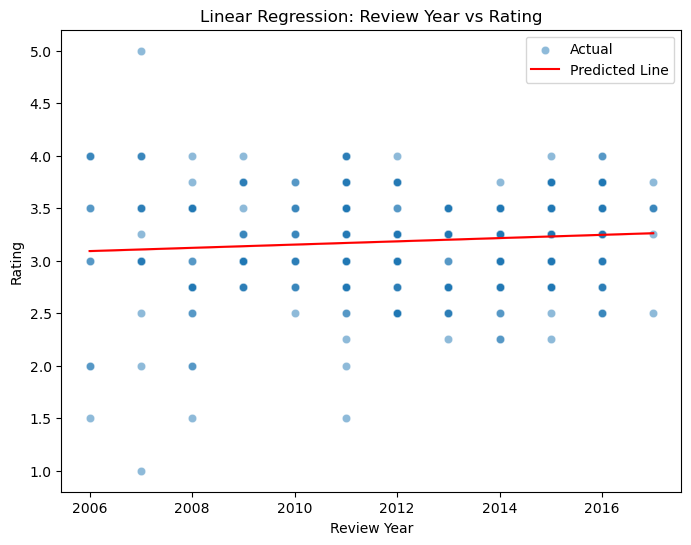

In [23]:
#Plot Regression Line with Test Data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_date.flatten(), y=y_test.flatten(), alpha=0.5, label="Actual")
sns.lineplot(x=X_test_date.flatten(), y=y_pred_date.flatten(), color="red", label="Predicted Line")
plt.title('Linear Regression: Review Year vs Rating')
plt.xlabel('Review Year')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [24]:
#Model Performance (MSE & R²)
mse_date = mean_squared_error(y_test, y_pred_date)
r2_date = r2_score(y_test, y_pred_date)

print("Mean Squared Error:", mse_date)
print("R² Score:", r2_date)

Mean Squared Error: 0.22846902061179772
R² Score: 0.011653407888928435


In [25]:
#compare predicted vs actual
results_date = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_date.flatten()})
results_date.head(10)

,Actual,Predicted
0,3.00,3.138450
1,3.75,3.184881
2,3.50,3.215835
3,3.50,3.231312
4,3.00,3.215835
5,3.00,3.200358
6,2.75,3.169404
7,3.75,3.246789
8,2.50,3.184881
9,3.25,3.200358


### Interpretation for Review Year vs Rating

Observations from the regression results:

Mean Squared Error (MSE): 0.228 → The average squared difference between predicted and actual ratings is small, meaning predictions are close to the mean rating.

R² Score: 0.0117 → Almost 0, which means review year explains very little of the variation in chocolate ratings.

Predicted vs Actual: Predicted ratings are clustered around ~3.15–3.25, while actual ratings vary more widely (2.5–3.75 in the first 10 rows).

#### Linear Regression: Review Year vs Rating

The regression line shows a very weak trend between review year and chocolate ratings. The R² score (~0.01) indicates that review year alone explains almost none of the variation in ratings. The predicted values are clustered near the mean, while actual ratings vary more widely.  

#### Conclusion:
Ratings have remained fairly consistent over time, and review year is not a strong predictor of chocolate ratings.  

#### Reflection on Bias:
Ratings are subjective and may be influenced by reviewer preferences, brand recognition, or country-specific tastes. Additionally, certain years may have fewer reviews, which can affect model predictions.


In [26]:
#Create the High_Cocoa variable

# Create a new column: 1 if Cocoa_Percent > 70%, else 0
df['High_Cocoa'] = (df['Cocoa_Percent'] > 70).astype(int)

# Check the first few rows
df[['Cocoa_Percent', 'High_Cocoa', 'Rating']].head()

,Cocoa_Percent,High_Cocoa,Rating
0,63.0,0,3.75
1,70.0,0,2.75
2,70.0,0,3.00
3,70.0,0,3.50
4,70.0,0,3.50


The High_Cocoa variable is a binary indicator for chocolates with cocoa percentage greater than 70%. This allows us to test whether very high cocoa chocolates receive systematically higher or lower ratings compared to others.

#### Hypothesis
Chocolates with cocoa percentage above 70% (High_Cocoa = 1) will have lower average ratings compared to chocolates with lower cocoa content (High_Cocoa = 0).

In [27]:
#Prepare data for regression
# Independent variable (X) = High_Cocoa
X = df['High_Cocoa'].values.reshape(-1, 1)

# Dependent variable (y) = Rating
y = df['Rating'].values.reshape(-1, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#Run linear regression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y values for the test set
y_pred = model.predict(X_test)

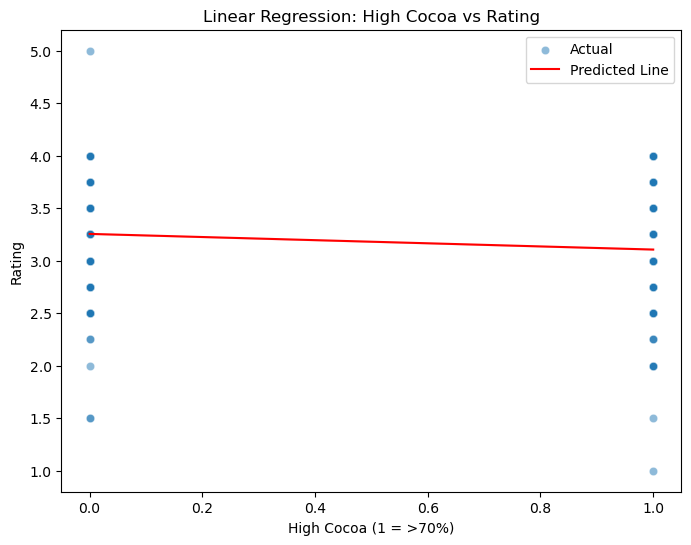

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), alpha=0.5, label="Actual")
sns.lineplot(x=X_test.flatten(), y=y_pred.flatten(), color="red", label="Predicted Line")
plt.title('Linear Regression: High Cocoa vs Rating')
plt.xlabel('High Cocoa (1 = >70%)')
plt.ylabel('Rating')
plt.legend()
plt.show()


In [31]:
#Check performance metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.2299563174165908
R² Score: 0.00521942955550414


In [32]:
#Compare predicted vs actual

results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
results.head(10)

,Actual,Predicted
0,3.00,3.106467
1,3.75,3.255611
2,3.50,3.255611
3,3.50,3.106467
4,3.00,3.255611
5,3.00,3.106467
6,2.75,3.106467
7,3.75,3.255611
8,2.50,3.106467
9,3.25,3.255611


#### Interpretation 

The regression line is essentially flat because the binary High_Cocoa variable does not explain much of the variation in ratings.

High cocoa content alone is not a strong predictor of chocolate ratings.

Other factors such as brand, origin, flavor, or ingredients likely have a larger impact on how chocolates are rated.

#### Reflection on Bias 

Ratings are subjective and influenced by personal taste, cultural background, and reviewer expectations.

This binary variable simplifies cocoa content into two categories, potentially oversimplifying the complexity of taste preferences.

Any conclusions drawn from this model should be taken cautiously, as the data may not represent all chocolate types or reviewers equally.

In [33]:
df.to_csv(os.path.join(path, '02 data', 'prepared data', 'cocoa_with_clusters.csv'), index=False)